In [87]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn
import datetime
import scipy
from pylab import rcParams
rcParams['figure.figsize']=15,6
RANDOM_SEED =152
LABELS=['Normal','Fraud']

In [88]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Preprocessing
Verifying NA cells 

In [89]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We are gonna make use of **Logistic Regression classifier** to determine validaity of the transaction.

In [91]:
data.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Let's validate whether our dataset contains duplicates or not. If yes. lets drop those.

In [92]:
data.duplicated().sum()

1081

In [93]:
data.drop_duplicates(inplace=True)

Let's verify duplicate now.

In [94]:
data.duplicated().sum()

0

Let's analyse the data using **Exploratory Data Analysis (EDA)** - It helps discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. 

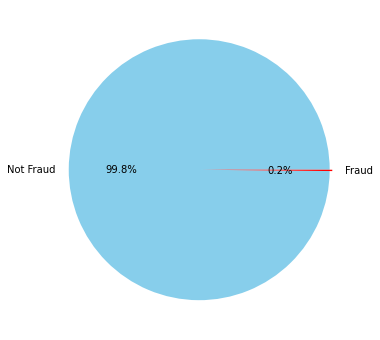

In [95]:
plt.figure(figsize=(10,6))
labels=['Not Fraud' , 'Fraud']
explode = [.01,.01]
color=['skyblue' , 'Red']
sizes=data.Class.value_counts().values

plt.pie(sizes,explode,labels,autopct="%1.1f%%", colors = color)
plt.show()

In [96]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]
print(fraud.shape , normal.shape)

(473, 31) (283253, 31)



In the given dataset we have total 473 fraud transactions.

In [97]:
fraud.Amount.describe().round(2)

count     473.00
mean      123.87
std       260.21
min         0.00
25%         1.00
50%         9.82
75%       105.89
max      2125.87
Name: Amount, dtype: float64

In [98]:
normal.Amount.describe().round(2)

count    283253.00
mean         88.41
std         250.38
min           0.00
25%           5.67
50%          22.00
75%          77.46
max       25691.16
Name: Amount, dtype: float64

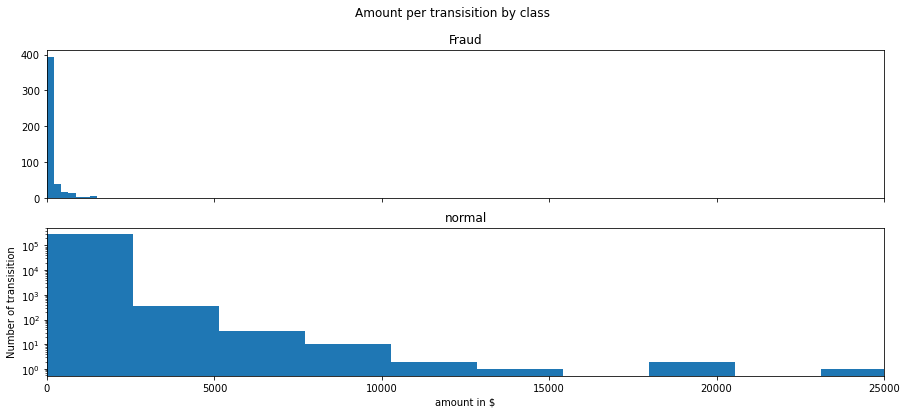

In [99]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transisition by class')
bins = 10
ax1.hist(fraud.Amount , bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount,bins=bins)
ax2.set_title('normal')

plt.xlabel('amount in $')
plt.ylabel('Number of transisition')

plt.xlim(0,25000)
plt.yscale('log')
plt.show()

Text(0.5, 1.0, 'normal')

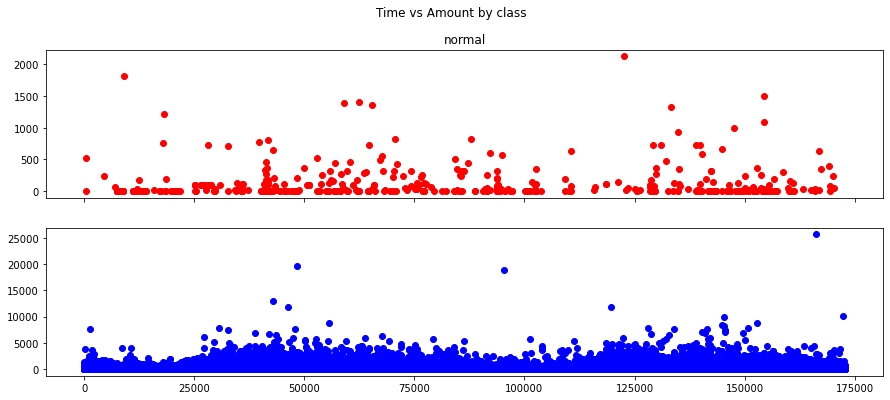

In [100]:
f , (ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Time vs Amount by class')

ax1.scatter(fraud.Time ,fraud.Amount,color = 'red')
ax1.set_title('Fraud')

ax2.scatter(normal.Time,normal.Amount,color = 'blue')
ax1.set_title('normal')

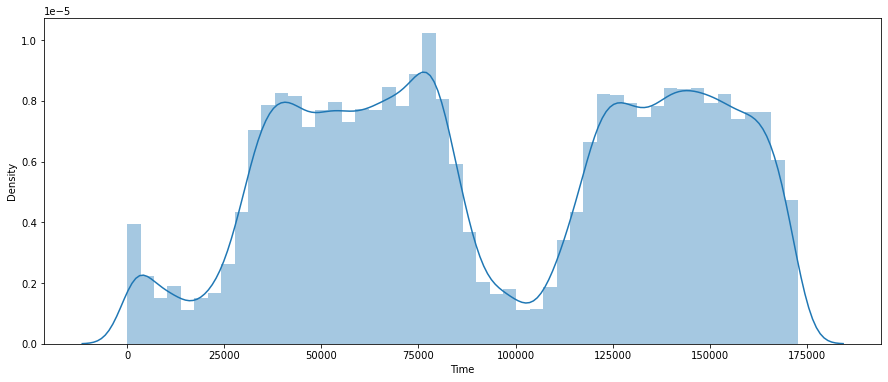

In [101]:
sns.distplot(data['Time'])
plt.show()

<AxesSubplot:>

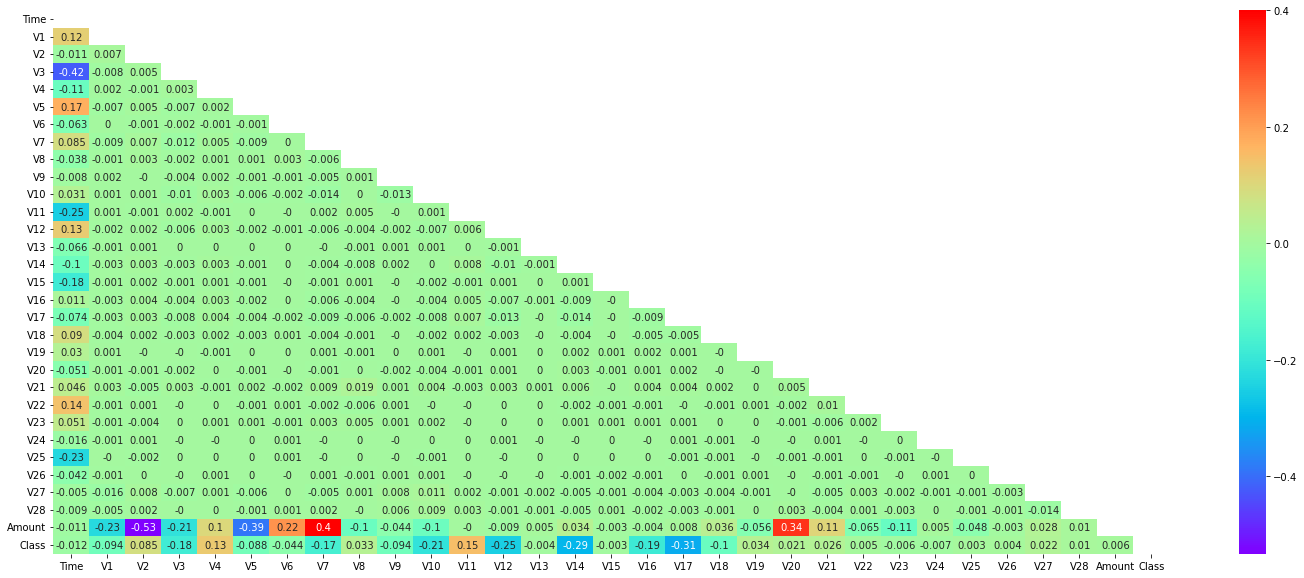

In [102]:
plt.figure(figsize=(25,10))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr().round(3),annot=True,cmap='rainbow', mask=mask)

Split teh dataset into train and test.

In [103]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [104]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test =train_test_split(x,y,train_size=0.75,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212794, 30)
(70932, 30)
(212794,)
(70932,)


**Logistic Regression**

In [105]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [106]:
y_pred_train =logit.predict(x_train)
y_pred_test=logit.predict(x_test)

In [107]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [108]:
print(confusion_matrix(y_train,y_pred_train))
print('-----------------')
print(confusion_matrix(y_test,y_pred_test))

[[212336    101]
 [   115    242]]
-----------------
[[70782    34]
 [   34    82]]


In [109]:
print(classification_report(y_train,y_pred_train))
print('-----------------')
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212437
           1       0.71      0.68      0.69       357

    accuracy                           1.00    212794
   macro avg       0.85      0.84      0.85    212794
weighted avg       1.00      1.00      1.00    212794

-----------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70816
           1       0.71      0.71      0.71       116

    accuracy                           1.00     70932
   macro avg       0.85      0.85      0.85     70932
weighted avg       1.00      1.00      1.00     70932



In [110]:
print('Train accurcay',accuracy_score(y_train,y_pred_train))
print('********')
print('Test accurcay',accuracy_score(y_test,y_pred_test))

Train accurcay 0.9989849337857271
********
Test accurcay 0.9990413353634466
